In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.ensemble
from sklearn.model_selection import train_test_split
import sklearn.metrics 

In [2]:
from scipy.io import arff

data = arff.loadarff('1year.arff')
df = pd.DataFrame(data[0])

for i in range(2,6):
    data = arff.loadarff(str(i)+'year.arff')
    df_temp = pd.DataFrame(data[0])
    df = df.append(df_temp)

In [3]:
df.keys()
df = df.dropna()

target = np.array(df['class']).astype(int)
data = df.drop(['class'],axis=1)
df2 = pd.read_csv("labels.csv")
df2.keys()
predictors = df2['label']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.5)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test, train_size=0.4)

In [5]:
n_trees = np.arange(1,10,1)
f1_train = []
f1_test = []
feature_importance = np.zeros((len(n_trees), len(predictors)))

for i, n_tree in enumerate(n_trees):
    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_tree, max_features='sqrt',bootstrap=True)
    clf.fit(x_train, y_train)
    f1_train.append(sklearn.metrics.f1_score(y_train, clf.predict(x_train)))
    f1_test.append(sklearn.metrics.f1_score(y_test, clf.predict(x_test)))
    feature_importance[i, :] = clf.feature_importances_

In [6]:
# plt.scatter(n_trees, f1_test)

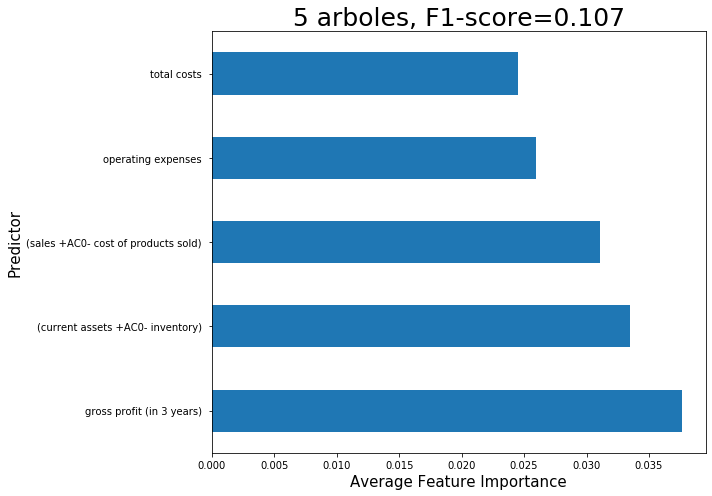

In [7]:
ii = np.argmax(f1_test)
n_tree_max = n_trees[ii]

fig = plt.figure(figsize=(10,7))

clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_tree_max, max_features='log2',bootstrap=True)
clf.fit(x_train, y_train)
f1 = sklearn.metrics.f1_score(y_valid, clf.predict(x_valid))

avg_importance = np.average(feature_importance, axis=0)
a = pd.Series(avg_importance, index=predictors)
# print(a)
a.nlargest().plot(kind='barh')
plt.xlabel('Average Feature Importance', size=15)
plt.ylabel("Predictor",size=15)
plt.title(str(n_tree_max)+" arboles, F1-score="+str(round(f1,3)),size=25)
plt.tight_layout()
plt.savefig("features.png",bbox_tight=True)